# Tugas Crawling_berita_Kompas dan ekstrak kata kunci
*   Nama : Muhammad Adam Zaky Jiddyansah
*   NIM : 210411100234
*   Kelas : Penambangan dan Pencarian Web B



## Menginstall dan mengimport library yang dibutuhkan
Libraries yang Digunakan
*   BeautifulSoup (bs4): Library untuk melakukan web scraping dan ekstraksi data HTML.
*   Requests: Library untuk membuat permintaan HTTP ke situs web dan mendapatkan konten halaman.
*   Pandas (pd): Library untuk mengelola dan menyimpan data dalam format CSV.


In [ ]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Web Scraping Berita Kompas dan Penyimpanan ke Google Drive
Kode ini menggunakan teknik web scraping untuk mengumpulkan judul dan isi berita dari 200 halaman indeks situs Kompas.com. Berikut adalah penjelasan komponen utama dari kode tersebut:

**Proses Web Scraping dan menyimpan data**
*   Iterasi sebanyak 5 (karna yang akan dipreprocessing kali ini cuman 1 berita) halaman indeks(tergantung indeks pada website) di situs Kompas.com.
*   Untuk setiap halaman, melakukan permintaan HTTP dan mendapatkan konten HTML.
*   Menggunakan BeautifulSoup untuk mengekstrak daftar berita dari halaman tersebut.
*   Untuk setiap berita, mengakses halaman individu untuk mengambil judul dan isi berita.
*   Data judul dan isi berita ditambahkan ke dalam dictionary csv.
Penyimpanan Data
*   Setelah proses scraping selesai, data disimpan dalam file CSV dengan nama "Data_BeritaKompas.csv" terlebih dahulu di environment Colab.
*   File CSV tersebut disalin ke dalam Google Drive pada path "/content/drive/My Drive/Penambangan WEB/Data/".





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

csv = {"Judul": [], "Berita": []}

for i in range(1, 20):
    url = "https://indeks.kompas.com/?page={}".format(i)
    client = requests.get(url)
    page_html = client.content
    page_soup = soup(page_html, "html.parser")
    berita = page_soup.findAll("div", {"class": "latest--indeks mt2 clearfix"})

    for h in berita:
        r = requests.get(h.select_one('a.article__link')['href'])
        page = soup(r.content, "html.parser")
        halaman_isi = page.select_one("div", {"class": "col-bs10-10"})

        judul_berita = halaman_isi.select("h1", {"class": "read__title"})
        judul = judul_berita[0].text

        isi_berita = halaman_isi.findAll('p')
        isi = '\n'.join([p.get_text() for p in isi_berita])

        csv["Judul"].append(judul)
        csv["Berita"].append(isi)

        data = pd.DataFrame(csv)
        csv_path_drive = '/content/drive/My Drive/Penambangan WEB/Data/Data_BeritaKompas.csv'
        data.to_csv(csv_path_drive, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import dan Membaca Data CSV
Menggunakan Pandas untuk membaca file CSV yang telah disimpan sebelumnya. File CSV tersebut berisi data judul dan isi berita dari Kompas.com yang telah di-web scrape sebelumnya, lalu menampilkan data yang telah dibaca dari file CSV dalam bentuk DataFrame untuk dapat dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Penambangan WEB/Data/Data_BeritaKompas.csv"
df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Judul,Berita
0,"Lirik dan Makna Lagu Oh Indang Oh Apang, Lagu ...","Lirik dan Makna Lagu Oh Indang Oh Apang, Lagu ..."
1,Berapa Banyak Kalori yang Dibakar dengan Berja...,Berapa Banyak Kalori yang Dibakar dengan Berja...
2,"Pendaftaran Petugas KPPS Pemilu 2024 Dibuka, B...","Pendaftaran Petugas KPPS Pemilu 2024 Dibuka, B..."
3,Produser Ungkap Tiket Advance Siksa Neraka Sol...,Produser Ungkap Tiket Advance Siksa Neraka Sol...
4,"Peringati Hari Korban 40 Ribu Jiwa, Pj Gubernu...","Peringati Hari Korban 40 Ribu Jiwa, Pj Gubernu..."
5,Lirik dan Chord Lagu Salam Kenal - Vidi Aldiano,Lirik dan Chord Lagu Salam Kenal - Vidi Aldian...
6,"Pikap Tabrak Truk Tronton di Kota Malang, Satu...","Pikap Tabrak Truk Tronton di Kota Malang, Satu..."
7,Perbandingan Yamaha XMAX 250 Tech Max dan Kymc...,Perbandingan Yamaha XMAX 250 Tech Max dan Kymc...
8,Hasil Mediasi Keluarga Bayi HNM: RS Hermina Po...,Hasil Mediasi Keluarga Bayi HNM: RS Hermina Po...
9,"Tanggapi Hasil Survei Litbang ""Kompas"", Mahfud...","Tanggapi Hasil Survei Litbang ""Kompas"", Mahfud..."


## Mengambil salah satu berita untuk menjadi sampel data yang akan dianalisis

In [ ]:
berita = df['Berita'].iloc[15]
berita

'Begini Peran Teknik Industri dalam Pemanfaatan AI di Era Industri 4.0\n\nKOMPAS.com – Implementasi kecerdasan buatan atau artificial intelligence (AI) dalam industri menjadi salah satu poin utama untuk merespons kompleksitas era digital.\nTidak hanya berpengaruh pada operasional bisnis, AI juga dapat membuka pintu bagi berbagai peluang inovatif.\nSelain AI, era yang dikenal sebagai industri 4.0 menggambarkan integrasi teknologi canggih lain, seperti internet of things (IoT) dan big data, dalam proses industri. Integrasi ini dilakukan untuk meningkatkan efisiensi dan produktivitas.\nPada tingkat global, AI telah menjadi katalisator perubahan dalam industri. Menurut laporan dari Grand View Research, pasar AI diproyeksikan mencapai nilai triliunan dollar AS pada 2028 dengan tingkat pertumbuhan yang signifikan.\nHal senada juga disampaikan National Technology Officer Microsoft Indonesia Panji Wasmana. Menurutnya, teknologi AI dan komputasi awan (cloud) memainkan peranan penting dalam mewu

## Pra-pemrosesan Teks / Preprocessing

Mengambil teks sebagai input dan melakukan beberapa langkah pra-pemrosesan pada teks dalam bahasa Indonesia. Langkah-langkah tersebut mencakup penghapusan angka, pembersihan karakter khusus, konversi teks ke huruf kecil, penghapusan kata-kata umum (stopwords), dan penggabungan kata-kata yang telah melalui proses sebelumnya. Tujuannya adalah membersihkan dan mempersiapkan teks agar dapat digunakan lebih lanjut dalam analisis atau pemrosesan lanjutan.


In [ ]:
def preprocessing(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s.]', '', text)
    text = text.lower()

    stop_words = set(stopwords.words('indonesian'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    preprocessing_text = ' '.join(filtered_words)

    return preprocessing_text

In [ ]:
berita = preprocessing(berita)
print(berita)

peran teknik industri pemanfaatan ai era industri . kompas.com implementasi kecerdasan buatan artificial intelligence ai industri salah poin utama merespons kompleksitas era digital. berpengaruh operasional bisnis ai membuka pintu peluang inovatif. ai era dikenal industri . menggambarkan integrasi teknologi canggih internet of things iot big data proses industri. integrasi meningkatkan efisiensi produktivitas. tingkat global ai katalisator perubahan industri. laporan grand view research pasar ai diproyeksikan mencapai nilai triliunan dollar as tingkat pertumbuhan signifikan. senada national technology officer microsoft indonesia panji wasmana. menurutnya teknologi ai komputasi awan cloud memainkan peranan mewujudkan industri .. industri meningkatkan kolaborasi automasi produktivitas kemampuan analisis data pelaku industri terdepan. survei pwc persen eksekutif perusahaan percaya ai berdampak positif rantai pasok meningkatkan visibilitas responsif perubahan pasar. tecermin sektor manufak

##Memisahakan kalimat dengan word tokenize

Tokenisasi kalimat adalah proses memecah sebuah teks menjadi kalimat-kalimat yang lebih kecil atau unit yang disebut token, di mana token dapat berupa kata, frasa, atau karakter. Word tokenization, atau tokenisasi kata, adalah jenis tokenisasi yang fokus pada memecah teks menjadi unit kata.

In [ ]:
kalimat = nltk.sent_tokenize(berita)
kalimat = [sentence.replace('.', '') for sentence in kalimat]
print(kalimat)

['peran teknik industri pemanfaatan ai era industri ', 'kompascom implementasi kecerdasan buatan artificial intelligence ai industri salah poin utama merespons kompleksitas era digital', 'berpengaruh operasional bisnis ai membuka pintu peluang inovatif', 'ai era dikenal industri ', 'menggambarkan integrasi teknologi canggih internet of things iot big data proses industri', 'integrasi meningkatkan efisiensi produktivitas', 'tingkat global ai katalisator perubahan industri', 'laporan grand view research pasar ai diproyeksikan mencapai nilai triliunan dollar as tingkat pertumbuhan signifikan', 'senada national technology officer microsoft indonesia panji wasmana', 'menurutnya teknologi ai komputasi awan cloud memainkan peranan mewujudkan industri  industri meningkatkan kolaborasi automasi produktivitas kemampuan analisis data pelaku industri terdepan', 'survei pwc persen eksekutif perusahaan percaya ai berdampak positif rantai pasok meningkatkan visibilitas responsif perubahan pasar', 'te

In [ ]:
kata = word_tokenize(berita)
kata = [k.lower() for k in kata if k != '.']
kata = list(set(kata))
print(kata)

['dihadapi', 'as', 'merangkul', 'pemborosan', 'printing', 'solusi', 'perguruan', 'signifikan', 'konsumsi', 'membuka', 'katalisator', 'konsep', 'desain', 'awan', 'serga', 'systems', 'pelaku', 'kolaborasi', 'menjembatani', 'monitor', 'pasar', 'mempertimbangkan', 'humanintegrated', 'peranan', 'pemanfaatan', 'laboratorium', 'produk', 'technology', 'memahami', 'binus', 'berhasil', 'sistem', 'pt', 'pers', 'head', 'senin', 'ergobike', 'rights', 'jaminan', 'cloud', 'gerakan', 'kesulitan', 'menentukan', 'prediksi', 'membekali', 'gramedia', 'produktivitas', 'diolah', 'peluang', 'proyek', 'gerinda', 'manusia', 'mm', 'analisis', 'didorong', 'upaya', 'rantai', 'representasi', 'nilai', 'kemampuan', 'terusmenerus', 'kebutuhan', 'mengintegrasikan', 'memprediksi', 'daya', 'oculusmeta', 'database', 'mengimplementasikannya', 'seiring', 'bisnis', 'diterima', 'pekerja', 'dilengkapi', 'pasok', 'berikut', 'senada', '..', 'study', 'diperbarui', 'terkait', 'terkini', 'mendukung', 'pengembangan', 'intelligence'

In [ ]:
# Inisialisasi DataFrame
matriks_kata = pd.DataFrame(0, index=kata, columns=kata)


In [ ]:
for sentence in kalimat:
    words = sentence.split()
    for i in range(len(words)-1):
        current_word = words[i]
        next_word = words[i+1]

        # Pastikan kedua kata ada dalam indeks matrikskata sebelum mengupdate nilai
        if current_word in matriks_kata.index and next_word in matriks_kata.columns:
            matriks_kata.at[current_word, next_word] += 1

In [ ]:
matriks_kata

,dihadapi,as,merangkul,pemborosan,printing,solusi,perguruan,signifikan,konsumsi,membuka,...,langsung,eksekutif,heart,relevan,pemahaman,operasional,industrial,panji,menekankan,computer
dihadapi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
as,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
merangkul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pemborosan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
printing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
operasional,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
industrial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
panji,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
menekankan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Perhitungan Kemiripan Kosinus
Menghitung kemiripan kosinus antara semua pasangan kalimat menggunakan matriks TF-IDF yang telah dihasilkan sebelumnya. Kemudian, hasil kemiripan kosinus tersebut disimpan dalam DataFrame untuk kemudahan analisis.

**Rumus Perhitungan Kemiripan Kosinus:**
*   Untuk dua vektor A dan B, kemiripan kosinus dihitung dengan rumus $$ \text{Similarity}(A, B) = \frac{{A \cdot B}}{{\|A\| \cdot \|B\|}} $$

*   Di sini, ⋅ adalah operasi perkalian dot (dot product), dan ∥∥ adalah norma Euclidean. Dalam konteks ini, vektor A dan B adalah vektor representasi TF-IDF dari dua kalimat. Hasilnya adalah skalar yang menunjukkan seberapa mirip dua kalimat tersebut, dengan nilai 1 menunjukkan kemiripan sempurna.


In [ ]:
cosine = cosine_similarity(matriks_kata, matriks_kata)

In [ ]:
similarity = pd.DataFrame(cosine, columns=matriks_kata.index, index=matriks_kata.index)
similarity

,dihadapi,as,merangkul,pemborosan,printing,solusi,perguruan,signifikan,konsumsi,membuka,...,langsung,eksekutif,heart,relevan,pemahaman,operasional,industrial,panji,menekankan,computer
dihadapi,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
merangkul,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pemborosan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
printing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
operasional,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
industrial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
panji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
menekankan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Visualisasi Hubungan Antar Kalimat Menggunakan Graf (Graph) berdasarkan Cosine Similarity
Membuat graf yang merepresentasikan hubungan antara kalimat-kalimat berdasarkan nilai cosine similarity. Setiap kalimat direpresentasikan sebagai node, dan garis yang menghubungkan dua node menunjukkan tingkat kemiripan antara kalimat tersebut. Semakin panjang dan tebal garis, semakin tinggi tingkat kemiripan antara dua kalimat. Graf ini membantu memvisualisasikan struktur hubungan antar kalimat dalam teks.

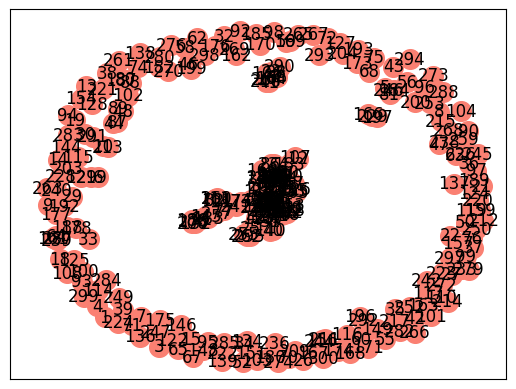

In [ ]:
G = nx.DiGraph()
for i in range(len(cosine)):
    G.add_node(i)

for i in range(len(cosine)):
    for j in range(len(cosine)):
        similarity = cosine[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='salmon')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

#Menemukan Kata kunci

##Page Rank
**PageRank** adalah algoritma yang dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google. Algoritma ini digunakan oleh mesin pencari Google untuk menentukan peringkat atau relevansi halaman web dalam hasil pencarian. Ide utama di balik PageRank adalah bahwa halaman web yang banyak di-link oleh halaman web lain dianggap lebih penting dan memiliki peringkat yang lebih tinggi.


**Konsep Dasar:**

Prinsip Dasar: PageRank bekerja berdasarkan prinsip bahwa sebuah tautan dari halaman A ke halaman B dapat dianggap sebagai suara suara atau dukungan dari halaman A untuk halaman B. Semakin banyak tautan yang menuju ke sebuah halaman, semakin besar "nilai suara" atau "nilai dukungan" yang diberikan oleh halaman tersebut.

Tautan Kembali (Backlink): Pentingnya suatu halaman tidak hanya bergantung pada jumlah tautan masuk, tetapi juga pada kualitas tautan tersebut. Tautan dari halaman dengan peringkat tinggi lebih berharga daripada tautan dari halaman dengan peringkat rendah.
Rumus dasar PageRank dapat direpresentasikan sebagai sistem persamaan linear. Misalkan ada N  halaman web, dan PR(A) adalah PageRank halaman A Persamaan PageRank untuk halaman A adalah :


$$[PR(A) = (1 - d) + d \\left( \\frac{{PR(B)}}{{L(B)}} + \\frac{{PR(C)}}{{L(C)}} + \\ldots + \\frac{{PR(N)}}{{L(N)}} \\right)$$



Dengan :

\(d\) adalah faktor damping (biasanya diatur sekitar 0.85)."

\(PR(B), PR(C), \\ldots, PR(N)\) adalah PageRank dari halaman-halaman yang terhubung ke halaman \(A\)."

\(L(B), L(C), \\ldots, L(N)\)$$ adalah jumlah tautan keluar dari halaman \(B, C, \\ldots, N\)."


In [ ]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 194: 0.0188
Node 208: 0.0167
Node 251: 0.0163
Node 164: 0.0156
Node 231: 0.0129
Node 79: 0.0126
Node 69: 0.0126
Node 198: 0.0125
Node 232: 0.0112
Node 61: 0.0112
Node 235: 0.0106
Node 254: 0.0103
Node 11: 0.0096
Node 227: 0.0096
Node 0: 0.0091
Node 2: 0.0091
Node 16: 0.0091
Node 57: 0.0091
Node 141: 0.0091
Node 158: 0.0091
Node 210: 0.0091
Node 256: 0.0091
Node 281: 0.0091
Node 289: 0.0091
Node 91: 0.0090
Node 20: 0.0089
Node 195: 0.0089
Node 246: 0.0084
Node 25: 0.0084
Node 80: 0.0084
Node 229: 0.0084
Node 243: 0.0084
Node 24: 0.0076
Node 54: 0.0076
Node 83: 0.0076
Node 109: 0.0076
Node 113: 0.0076
Node 150: 0.0076
Node 179: 0.0076
Node 275: 0.0076
Node 147: 0.0073
Node 31: 0.0067
Node 277: 0.0067
Node 41: 0.0064
Node 216: 0.0064
Node 264: 0.0064
Node 241: 0.0059
Node 6: 0.0057
Node 10: 0.0057
Node 30: 0.0057
Node 34: 0.0057
Node 44: 0.0057
Node 46: 0.0057
Node 47: 0.0057
Node 48: 0.0057
Node 59: 0.0057
Node 63: 0.0057
Node 64: 0.0057
Node 87: 0.0057
Node 89: 0.0057
N

In [ ]:
print("3 Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")


3 Node Tertinggi Page Rank :
Node 194: Page Rank = 0.0188
Kalimat: ai
Node 208: Page Rank = 0.0167
Kalimat: proses
Node 251: Page Rank = 0.0163
Kalimat: industri


In [ ]:
news = df['Berita'].iloc[15]
print('Berita yang digunakan : ')
news

Berita yang digunakan : 


'Begini Peran Teknik Industri dalam Pemanfaatan AI di Era Industri 4.0\n\nKOMPAS.com – Implementasi kecerdasan buatan atau artificial intelligence (AI) dalam industri menjadi salah satu poin utama untuk merespons kompleksitas era digital.\nTidak hanya berpengaruh pada operasional bisnis, AI juga dapat membuka pintu bagi berbagai peluang inovatif.\nSelain AI, era yang dikenal sebagai industri 4.0 menggambarkan integrasi teknologi canggih lain, seperti internet of things (IoT) dan big data, dalam proses industri. Integrasi ini dilakukan untuk meningkatkan efisiensi dan produktivitas.\nPada tingkat global, AI telah menjadi katalisator perubahan dalam industri. Menurut laporan dari Grand View Research, pasar AI diproyeksikan mencapai nilai triliunan dollar AS pada 2028 dengan tingkat pertumbuhan yang signifikan.\nHal senada juga disampaikan National Technology Officer Microsoft Indonesia Panji Wasmana. Menurutnya, teknologi AI dan komputasi awan (cloud) memainkan peranan penting dalam mewu

In [ ]:
print('Kata Kunci :', sentence)

Kata Kunci : ai, proses, industri, 
